In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
df = pd.read_csv(r"C:\Users\Naman jain\Downloads\Data_file - data_file.csv")
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [46]:
df.describe()


,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


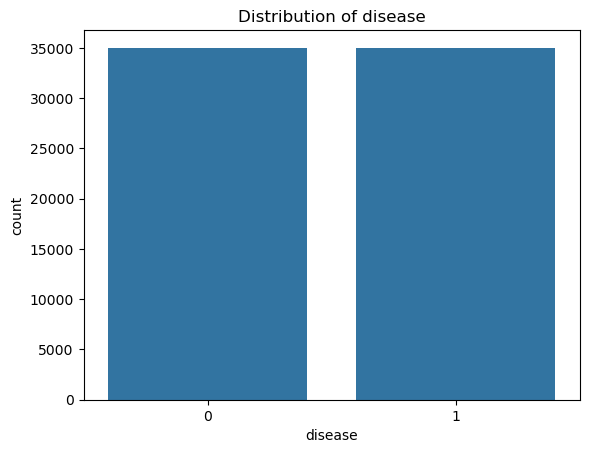

In [50]:
sns.countplot(x='disease',data=df)
plt.title('Distribution of disease')
plt.show()

In [56]:
df = df.drop(columns=['date','id'])

In [58]:
df.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


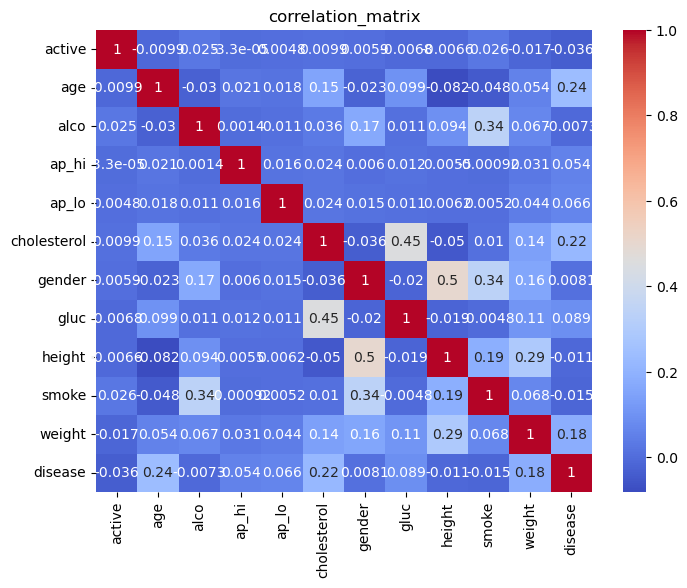

In [64]:
num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)
correlation_matrix = df[num_cols].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm')
plt.title('correlation_matrix')
plt.show()

In [66]:
label_encoders = {}
for column in ['country', 'occupation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(['disease'],axis =1)
y = df['disease']

In [68]:
X.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight
0,1,1,18393,0,110,80,1,2,1,168,1,0,62.0
1,2,1,20228,0,140,90,3,1,1,156,0,0,85.0
2,1,0,18857,0,130,70,3,1,1,165,2,0,64.0
3,3,1,17623,0,150,100,1,2,1,169,5,0,82.0
4,3,0,17474,0,100,60,1,1,1,156,1,0,56.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

In [82]:
print(f'Decision Tree Accuracy : {decision_tree_accuracy*100:.2f}%')
print('\nDecision Tree Classification Report')
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy : 64.03%

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      7069
           1       0.64      0.63      0.64      6931

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



In [ ]:
import numpy as np

# Function to take user input and predict disease
def predict_disease():
    print("Enter the following details:")
    
    age = int(input("Age: "))
    gender = int(input("Gender (1 = Female, 2 = Male): "))
    height = int(input("Height (in cm): "))
    weight = float(input("Weight (in kg): "))
    ap_hi = int(input("Systolic Blood Pressure (ap_hi): "))
    ap_lo = int(input("Diastolic Blood Pressure (ap_lo): "))
    cholesterol = int(input("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = High): "))
    gluc = int(input("Glucose Level (1 = Normal, 2 = Above Normal, 3 = High): "))
    smoke = int(input("Do you smoke? (0 = No, 1 = Yes): "))
    alco = int(input("Do you consume alcohol? (0 = No, 1 = Yes): "))
    active = int(input("Are you physically active? (0 = No, 1 = Yes): "))
    
    # Encode categorical values
    country = input("Country: ")
    occupation = input("Occupation: ")
    
    if country in label_encoders["country"].classes_:
        country_encoded = label_encoders["country"].transform([country])[0]
    else:
        country_encoded = 0  # Default if unknown
    
    if occupation in label_encoders["occupation"].classes_:
        occupation_encoded = label_encoders["occupation"].transform([occupation])[0]
    else:
        occupation_encoded = 0  # Default if unknown
    
    # Arrange input data in the correct order
    user_data = np.array([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc,
                           smoke, alco, active, country_encoded, occupation_encoded]])
    
    # Make prediction
    prediction = decision_tree.predict(user_data)
    
    # Output result
    if prediction[0] == 1:
        print("\nPrediction: You may have heart disease. Consult a doctor.")
    else:
        print("\nPrediction: No heart disease detected.")

# Run the function
predict_disease()


Enter the following details:
